## Prediction

In [181]:
import pandas as pd
data = pd.read_csv("Train1.0.csv", sep=',',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   float64
 5   total_day_charge               4250 non-null   float64
 6   total_eve_minutes              4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_eve_charge               4250 non-null   float64
 9   total_night_minutes            4250 non-null   float64
 10  total_night_calls              4250 non-null   float64
 11  total_night_charge             4250 non-null   float64
 12  total_intl_minutes             4250 non-null   float6

In [182]:
X = data.drop('churn', axis=1)
y = data.churn

In [183]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval =train_test_split (X, y, test_size=0.3, random_state=666)

In [184]:
Xtrain.shape

(2975, 19)

In [185]:
Xval.shape

(1275, 19)

### 1. Linear Regression

In [186]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1500).fit(Xtrain,Ytrain)

In [187]:
LR.score(Xtrain,Ytrain)

1.0

In [188]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X, y, cv=5, scoring='accuracy')
scores

array([1., 1., 1., 1., 1.])

In [189]:
pd.DataFrame(dict(zip(Xtrain.columns,LR.coef_[0])),index=['coef_'])

,account_length,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_charges,total_calls,total_minutes
coef_,0.001509,9.124026,-0.011474,-0.003215,0.0106,-0.00561,-0.008112,0.00977,-0.00086,-0.008877,0.009481,-0.005616,0.031173,-0.040335,0.009573,0.297593,-0.002513,-0.010485,0.010969


In [190]:
LR.score(Xval,Yval)

1.0

### 2. Random Forest

1.0 0


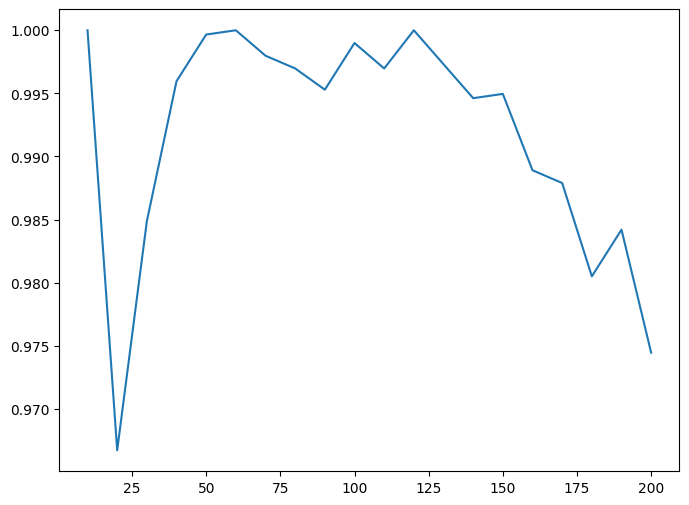

In [191]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
score = []
for i in range(10,201,10):
    rfc = RFC(n_estimators= i,max_depth=3,random_state=0)
    score_ = cross_val_score(rfc,Xtrain,Ytrain,cv=5).mean()
    score.append(score_)
print(max(score),np.argmax(score))
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score)
plt.show()

score: 1.0 Max depth 5


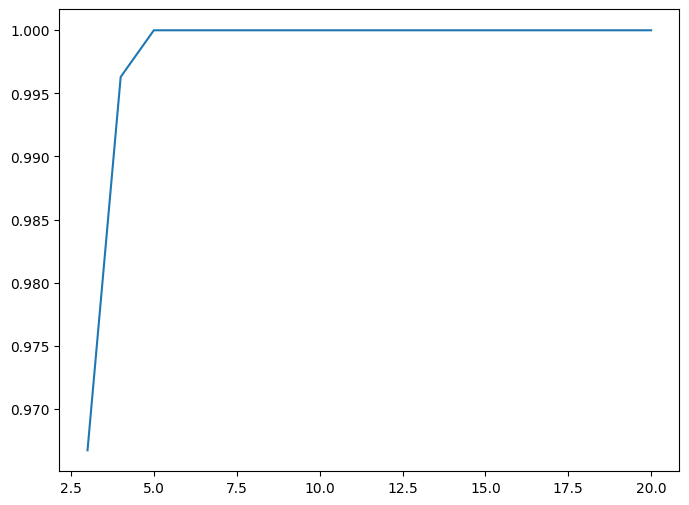

In [192]:
score_2= []
for i in np.arange(3, 21, 1):
    rfc = RFC(n_estimators= 20,max_depth= i,random_state=0)
    score_ = cross_val_score(rfc,Xtrain,Ytrain,cv=5).mean()
    score_2.append(score_)
print('score:',max(score_2),'Max depth',np.arange(3, 21, 1)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(3, 21, 1),score_2)
plt.show()

score: 1.0 Min branch: 2


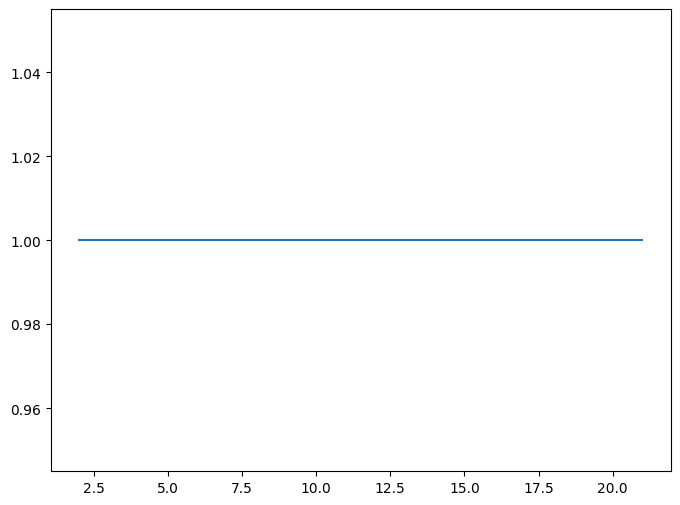

In [193]:
score_3 = []
for i in np.arange(2, 22, 1):
    rfc = RFC(n_estimators= 20,max_depth= 20,min_samples_split= i,random_state=0)
    score_ = cross_val_score(rfc,Xtrain,Ytrain,cv=5).mean()
    score_3.append(score_)
print('score:',max(score_3),'Min branch:',np.arange(2, 22, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_3)
plt.show()

score: 1.0 Min leaf: 1


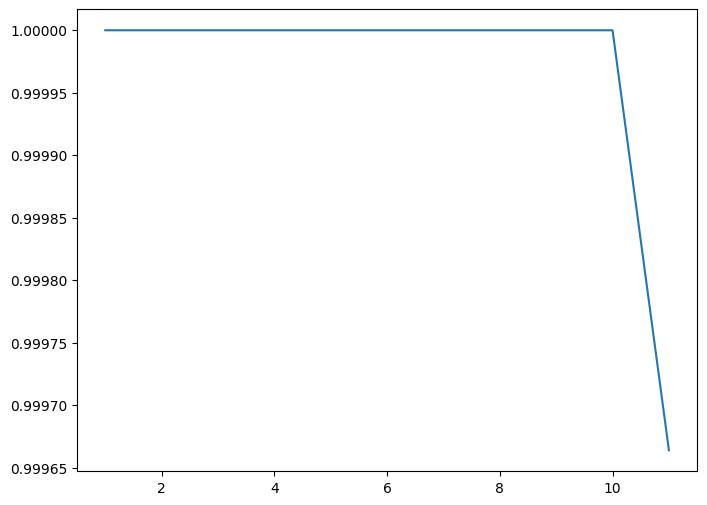

In [194]:
score_4 = []
for i in np.arange(1, 12, 1):
    rfc = RFC(n_estimators= 20,max_depth= 20,min_samples_split= 2,min_samples_leaf = i,random_state=0)
    score_ = cross_val_score(rfc,Xtrain,Ytrain,cv=5).mean()
    score_4.append(score_)
print('score:',max(score_3),'Min leaf:',np.arange(1, 12, 1)[np.argmax(score_4)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 12, 1),score_4)
plt.show()

1.0 Best classfier number: 10


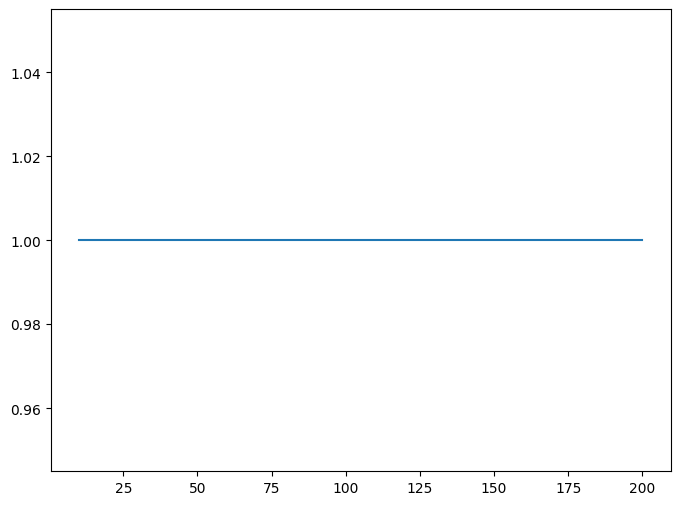

In [195]:
score_5 = []
for i in range(10,201,10):
    rfc = RFC(n_estimators= i,max_depth=20,random_state=0)
    score_ = cross_val_score(rfc,Xtrain,Ytrain,cv=5).mean()
    score_5.append(score_)
print(max(score_5),'Best classfier number:',range(10,201,10)[np.argmax(score_5)])
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score_5)
plt.show()

In [196]:
clf = RFC(n_estimators=200
         ,max_depth=5
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain,Ytrain)

In [197]:
clf.score(Xtrain,Ytrain)

1.0

In [198]:
clf.score(Xval,Yval)

1.0

In [199]:
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores

array([1., 1., 1., 1., 1.])